# Classification of Handwritten Digits

** Description about MNIST data **

MNIST data is a set of 70,000 small images of handwritten digits by students and employees. Each data point represents a set of labelled images represnting a digit. MNIST is the most studied dataset for a classification model.

** Getting the MNIST data set **

sklearn has modules to download wellknown datasets including MNIST data set

In [1]:
from sklearn.datasets import fetch_mldata
import seaborn as sns

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Dataset from sklearn usually has dictionary datastructure where'DESCR' key has Description as a value, 'COL_NAMES' has column names as a value, 'data'has array of features and data points as values and 'target' has labels.

In [3]:
X = mnist['data']
y = mnist['target']
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
y = y.reshape(70000,1)

In [7]:
y.shape

(70000, 1)

**Let us analyze the data by converting the data into data frames**


In [8]:
import pandas as pd
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

Analyzing input data: Input data has 784 features representing 28*28 pixel of each datapoint.
There are about 7000 such datapoints meaning 7000 images. Each feature has values from 0 to 255, 0 representing white & 255 representing black

In [9]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 52.3 MB


In [10]:
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Analyzing labels: output labels has 7000 datapoints each having vales from 0 to 9 representing digits.

In [11]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
0    70000 non-null float64
dtypes: float64(1)
memory usage: 547.0 KB


In [12]:
y_df.describe()

,0
count,70000.000000
mean,4.452429
std,2.890195
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


** Getting data from yann lecunn dataset** 

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [13]:
import idx2numpy

**Extract Training data**

In [14]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [15]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
X_train.shape

(60000, 784)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train.shape

(60000,)

**Extract Test data**

In [19]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [20]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
X_test.shape

(10000, 784)

In [22]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
y_test.shape

(10000,)

**Function to display a digit image from one 1-d representation of pixels**

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
    image = image.reshape(28,28)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    plt.title("Image Representation for %d" %(label))
    plt.show()

**Displaying a set of digits **

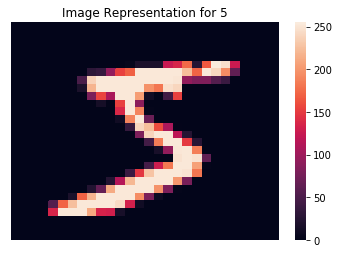

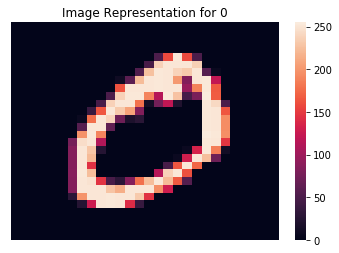

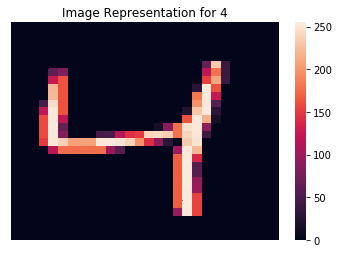

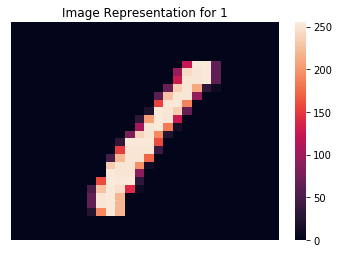

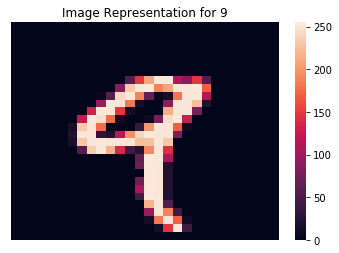

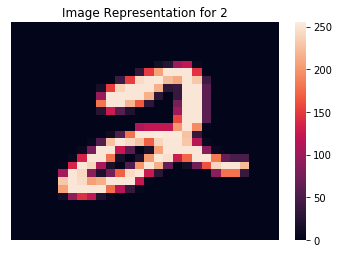

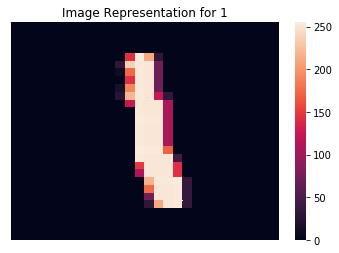

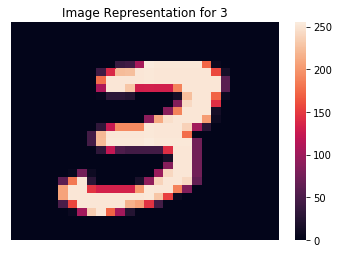

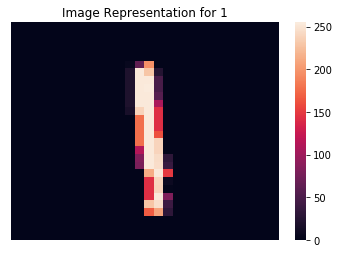

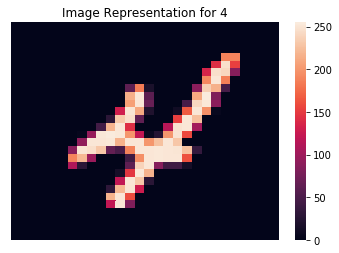

In [25]:
for i in range(10):
    display(X_train[i],y_train[i])

**Evaluate the performance of the model for 5 Epochs**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
log_clf = LogisticRegression(random_state=0,max_iter=5)

y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=3)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Calculate Cross Validation Score**

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.8945211 ,  0.88939447,  0.89853478])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [28]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [30]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [31]:
confusionMatrix

array([[5735,    1,   15,   11,   15,   26,   51,    7,   56,    6],
       [   1, 6540,   30,   21,    7,   34,    8,   12,   82,    7],
       [  43,   87, 5188,   95,  110,   22,   89,  113,  180,   31],
       [  38,   54,  154, 5323,   11,  208,   46,   81,  150,   66],
       [  12,   38,   43,    9, 5319,    8,   48,   10,   70,  285],
       [ 107,   54,   46,  306,   99, 4116,  149,   32,  382,  130],
       [  38,   21,   37,    6,   43,   77, 5638,    4,   50,    4],
       [  30,   74,   61,   23,   77,   10,    5, 5755,   24,  206],
       [  57,  219,   58,  157,   48,  252,   51,   39, 4869,  101],
       [  47,   38,   33,   98,  228,   57,    4,  210,   68, 5166]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

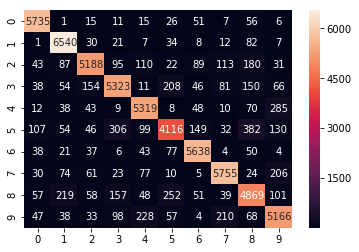

In [32]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [33]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [34]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

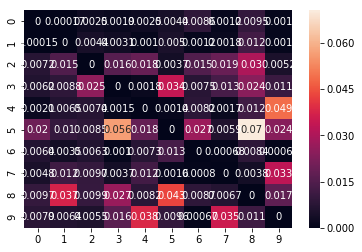

In [35]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [36]:
y_test_pred = log_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 8, 6], dtype=uint8)

In [37]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 961,    0,    1,    1,    0,    0,   10,    2,    5,    0],
       [   0, 1106,    2,    3,    1,    1,    4,    2,   16,    0],
       [   9,   12,  902,   16,   11,    1,   13,   17,   46,    5],
       [   3,    1,   21,  916,    1,   22,    4,   10,   24,    8],
       [   1,    4,    6,    1,  904,    1,    8,    1,   10,   46],
       [  16,    6,    4,   48,   16,  695,   25,   13,   58,   11],
       [   9,    3,    4,    1,   10,    9,  913,    2,    7,    0],
       [   2,   17,   20,    5,    9,    2,    1,  936,    4,   32],
       [  14,   18,    6,   24,   13,   30,   11,   15,  831,   12],
       [  11,    8,    3,   14,   49,   14,    0,   31,   11,  868]], dtype=int64)

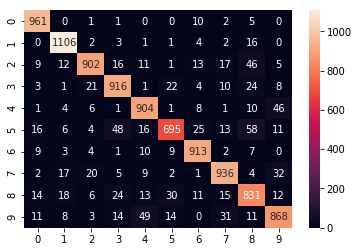

In [38]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [39]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

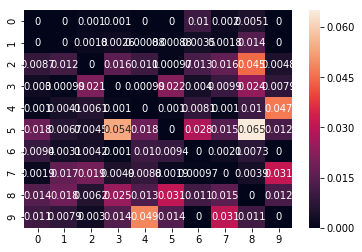

In [40]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9032

**Evaluating the performance for 10 epochs**

In [42]:
import numpy as np
log_clf = LogisticRegression(random_state=0,max_iter=10)

In [43]:
y_train_pred= cross_val_predict(log_clf, X_train, y_train, cv=3)
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Calculate Scross Validation Score**

In [44]:
cross_val_score(log_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.90881824,  0.90764538,  0.91458719])

In [45]:
confusionMatrix = confusion_matrix(y_train, y_train_pred)
confusionMatrix

array([[5732,    1,   26,   15,   11,   30,   47,    7,   50,    4],
       [   1, 6560,   36,   15,    9,   18,    6,    9,   77,   11],
       [  49,   72, 5268,  113,   67,   23,   90,   71,  191,   14],
       [  35,   30,  161, 5414,   10,  176,   31,   52,  154,   68],
       [  16,   23,   31,    8, 5381,   11,   44,   18,   77,  233],
       [  77,   25,   44,  225,   69, 4535,  126,   22,  222,   76],
       [  45,   13,   36,    1,   36,   83, 5658,    1,   43,    2],
       [  24,   22,   67,   22,   67,    8,    3, 5791,   33,  228],
       [  50,  144,   76,  155,   41,  193,   43,   30, 5024,   95],
       [  38,   29,   27,   95,  184,   38,    3,  204,   73, 5258]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

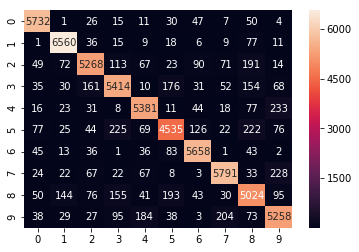

In [46]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [47]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

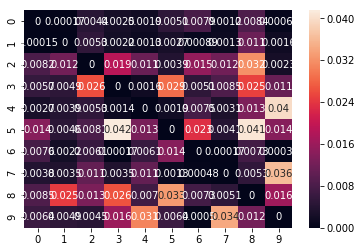

In [48]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [49]:
log_clf.fit(X_train,y_train)
y_test_pred=log_clf.predict(X_test)

In [50]:
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Plot Confusion Matrix against Test data**

In [51]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 960,    0,    0,    2,    0,    3,    7,    2,    4,    2],
       [   0, 1116,    2,    1,    0,    1,    4,    1,    9,    1],
       [   6,   10,  906,   18,   12,    5,   10,   10,   52,    3],
       [   4,    1,   20,  916,    2,   24,    5,   10,   20,    8],
       [   1,    2,    4,    2,  915,    0,   11,    2,   10,   35],
       [  13,    3,    1,   34,   10,  759,   16,    8,   35,   13],
       [  10,    3,    6,    2,    5,   14,  912,    0,    6,    0],
       [   2,    6,   22,    4,    7,    1,    1,  946,    8,   31],
       [  12,   13,    6,   21,   11,   29,    8,   12,  852,   10],
       [  11,    8,    1,   12,   33,    6,    1,   28,   13,  896]], dtype=int64)

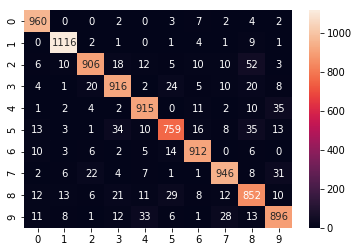

In [52]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [53]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

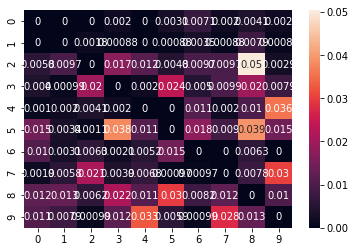

In [54]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [55]:
accuracy_score(y_test, y_test_pred)

0.91779999999999995

**Evaluate the performance of the model for 1 Epoch**

In [56]:
import numpy as np
log_clf = LogisticRegression(random_state=0,max_iter=1)

In [57]:
y_train_pred= cross_val_predict(log_clf, X_train, y_train, cv=3)
y_train_pred

array([3, 0, 4, ..., 3, 6, 0], dtype=uint8)

**Calculate Scross Validation Score**

In [58]:
cross_val_score(log_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.67836433,  0.68148407,  0.69395409])

In [59]:
confusionMatrix = confusion_matrix(y_train, y_train_pred)
confusionMatrix

array([[5508,   15,   43,   63,    8,    0,  253,   25,    0,    8],
       [   0, 6543,  131,   26,    6,    0,   19,   13,    0,    4],
       [ 117,  488, 4630,  182,   99,    0,  262,  167,    0,   13],
       [  78,  268,  240, 5190,   12,    0,   92,  151,    0,  100],
       [  25,  261,   45,   14, 4762,    0,  196,  119,    0,  420],
       [ 896,  888,   64, 2225,  208,    0,  366,  351,    2,  421],
       [ 114,  247,  126,   18,   30,    0, 5380,    1,    0,    2],
       [  96,  387,   87,   11,   63,    0,    5, 5543,    0,   73],
       [ 207, 2322,  448, 1625,  152,    0,  183,  328,   63,  523],
       [ 102,  335,   59,  144,  587,    0,   17, 1248,    0, 3457]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

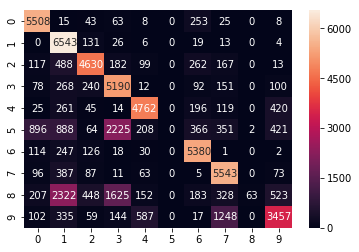

In [60]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [61]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

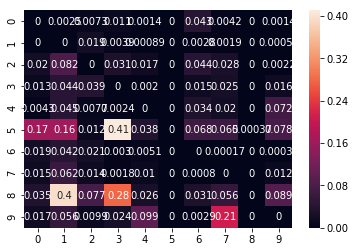

In [62]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [63]:
log_clf.fit(X_train,y_train)
y_test_pred=log_clf.predict(X_test)

In [64]:
y_test_pred

array([7, 2, 1, ..., 4, 1, 6], dtype=uint8)

**Plot Confusion Matrix against Test data**



In [65]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 920,    1,    5,   10,    0,    0,   38,    6,    0,    0],
       [   0, 1106,   20,    4,    0,    0,    4,    1,    0,    0],
       [  22,  103,  793,   35,   16,    0,   34,   28,    0,    1],
       [   6,   25,   30,  898,    0,    0,   10,   33,    0,    8],
       [   3,   46,    4,    0,  817,    0,   40,   10,    0,   62],
       [ 137,  126,    8,  379,   39,    0,   64,   76,    1,   62],
       [  26,   28,   18,    3,    6,    0,  877,    0,    0,    0],
       [   8,   65,   24,    1,   10,    0,    2,  906,    0,   12],
       [  54,  304,   61,  290,   31,    0,   48,   71,   17,   98],
       [  25,   41,    9,   15,  106,    0,    9,  163,    0,  641]], dtype=int64)

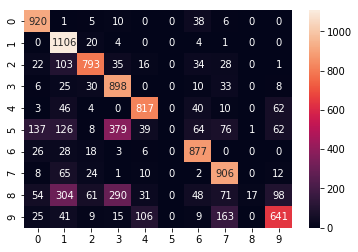

In [66]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**



In [67]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

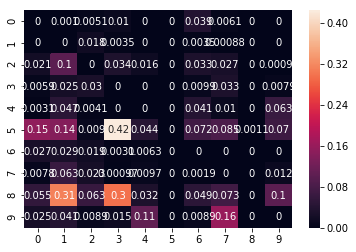

In [68]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [69]:
accuracy_score(y_test, y_test_pred)

0.69750000000000001

**Evaluate the performance against size of the training data of size 50000**

In [71]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_train = X_shuffle[0:50000]
y_train = y_shuffle[0:50000]
X_train.shape

(50000, 784)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
log_clf = LogisticRegression(random_state=0,max_iter=10)

y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=3)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Calculate Cross Validation Score**

In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.90779844,  0.91120178,  0.91118046])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [74]:
y_train_pred

array([1, 1, 1, ..., 6, 7, 4], dtype=uint8)

In [75]:
y_train

array([1, 1, 1, ..., 6, 7, 4], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [76]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [77]:
confusionMatrix

array([[4769,    1,   18,    9,    8,   29,   39,    4,   46,    7],
       [   1, 5511,   30,    6,    6,   16,    6,    8,   63,   13],
       [  39,   60, 4382,   94,   54,   19,   68,   66,  161,   16],
       [  29,   24,  135, 4490,    6,  132,   27,   47,  133,   49],
       [  11,   20,   32,   12, 4437,   14,   46,   16,   56,  207],
       [  61,   24,   36,  195,   52, 3753,   90,   19,  199,   66],
       [  36,   17,   41,    5,   28,   67, 4724,    3,   41,    2],
       [  19,   28,   58,   13,   57,   11,    7, 4818,   28,  180],
       [  37,  115,   64,  126,   28,  148,   38,   27, 4222,   71],
       [  29,   23,   26,   83,  166,   33,    1,  157,   59, 4397]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

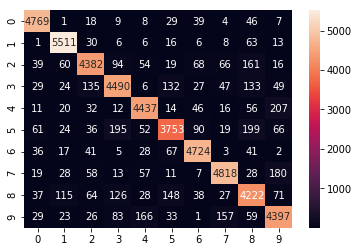

In [78]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [79]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [80]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

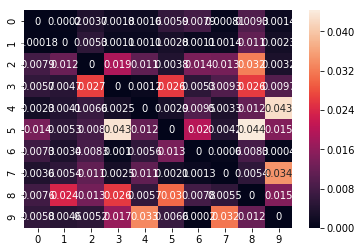

In [81]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [82]:
y_test_pred = log_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [83]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 957,    0,    1,    3,    0,    3,    6,    3,    5,    2],
       [   0, 1117,    2,    1,    0,    1,    4,    1,    8,    1],
       [   8,    9,  905,   18,   13,    3,   11,   11,   50,    4],
       [   4,    1,   19,  910,    2,   27,    4,   12,   21,   10],
       [   1,    2,    4,    2,  908,    0,   12,    3,   12,   38],
       [  13,    3,    0,   38,   13,  758,   17,    6,   34,   10],
       [  10,    3,    6,    1,    5,   15,  911,    0,    7,    0],
       [   2,    5,   20,    6,    8,    0,    1,  950,    5,   31],
       [  11,   13,    6,   20,   10,   28,    7,   11,  857,   11],
       [   9,    9,    1,   13,   38,    4,    1,   30,   12,  892]], dtype=int64)

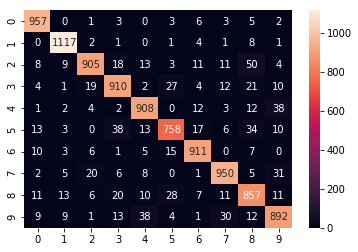

In [84]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [85]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

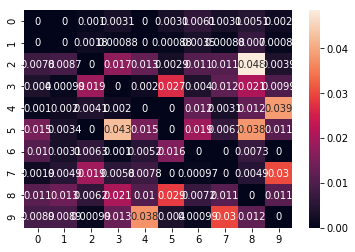

In [86]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.91649999999999998

**Evaluate the performance against size of the training data of size 30000**

In [70]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_train = X_shuffle[0:30000]
y_train = y_shuffle[0:30000]


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
log_clf = LogisticRegression(random_state=0,max_iter=10)

y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=3)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Calculate Cross Validation Score**

In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.90792762,  0.9077    ,  0.90617185])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [73]:
y_train_pred

array([4, 2, 3, ..., 2, 4, 1], dtype=uint8)

In [74]:
y_train

array([4, 2, 3, ..., 2, 4, 1], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [75]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [76]:
confusionMatrix

array([[2840,    1,   10,    7,    6,   15,   21,    4,   32,    3],
       [   1, 3278,   21,   11,    4,   14,    6,    2,   30,    8],
       [  26,   39, 2570,   60,   27,    9,   56,   42,   94,    8],
       [  18,   11,   93, 2741,    6,   91,   20,   24,   78,   33],
       [   5,   12,   20,    4, 2695,    5,   28,   12,   34,  134],
       [  32,   18,   16,  112,   33, 2230,   64,   10,  106,   48],
       [  21,    7,   22,    0,   17,   37, 2789,    3,   25,    0],
       [  11,   13,   37,    9,   39,    6,    5, 2920,   19,  125],
       [  25,   57,   32,   79,   26,   91,   22,   15, 2512,   61],
       [  25,   12,   22,   56,   95,   11,    1,  104,   28, 2643]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

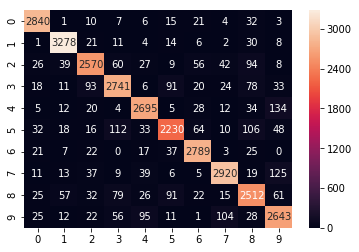

In [77]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [78]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [79]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

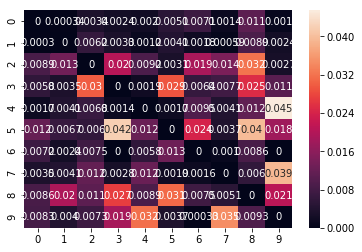

In [80]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [81]:
y_test_pred = log_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [82]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 963,    0,    0,    2,    0,    3,    5,    2,    5,    0],
       [   0, 1112,    3,    3,    0,    1,    5,    1,    9,    1],
       [   8,    8,  909,   16,    9,    5,   17,   11,   45,    4],
       [   4,    0,   17,  919,    2,   23,    4,   10,   23,    8],
       [   1,    1,    4,    1,  906,    0,   11,    3,   12,   43],
       [   8,    4,    5,   48,    9,  741,   15,   11,   39,   12],
       [   9,    3,    7,    1,    3,   13,  911,    1,   10,    0],
       [   3,    7,   21,    4,    9,    1,    1,  940,    6,   36],
       [  11,   13,    6,   22,   11,   27,    9,   13,  850,   12],
       [   6,    6,    2,   14,   33,    6,    0,   28,   11,  903]], dtype=int64)

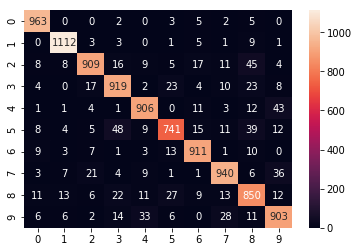

In [83]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [84]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

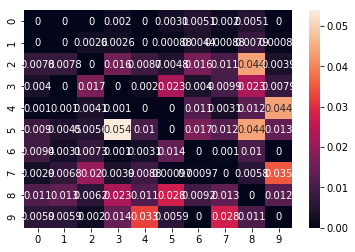

In [85]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.91539999999999999